In [181]:
%matplotlib notebook
%matplotlib inline
import pandas as df
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from scipy.optimize import curve_fit

In [2]:
# All Data is based on Official released by WHO gathered by Johns Hopkins
coronaData = df.read_csv("corona.csv")
# Well this data wasn't maintained lol

In [3]:
# The point of this analysis is to take a stats approach to the Coronavirus
coronaData

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,125260.0,132758.0,142534.0,153517.0,167515.0,179111.0,191127.0,209839.0,234073.0,266073.0
1,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,80981.0,80991.0,81021.0,81048.0,81077.0,81116.0,81116.0,81174.0,81300.0,81416.0
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Henan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Zhejiang,China,Western Pacific Region,NaN,5.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hunan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Anhui,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# We see there are lots of NaNs but by logic, they are most likely 0s so let's change them
coronaData = coronaData.fillna(0)
# Now let's also remove the labels
coronaData = coronaData.drop(columns=["Province/States","Country/Region","WHO region"])

In [5]:
# Get first row
globalData = coronaData.iloc[0]

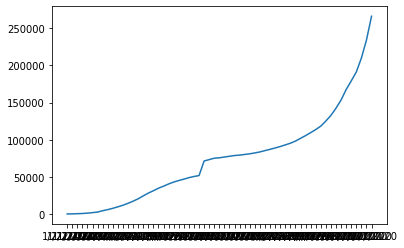

In [6]:
#Plot it
plt.plot(globalData)

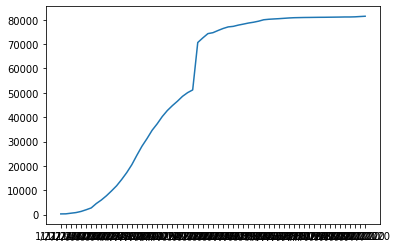

In [7]:
# Now let's check out china only
chinaData = coronaData.iloc[1]
plt.plot(chinaData)

In [8]:
globalData.corr(chinaData)

0.8082322277091146

In [9]:
coronaData.iloc[0].corr(coronaData.iloc[1])

0.8082322277091146

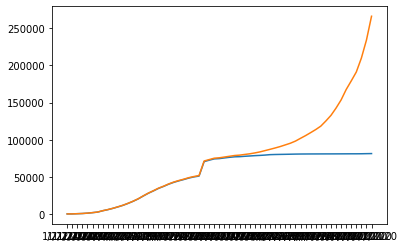

In [10]:
plt.plot(chinaData)
plt.plot(globalData)

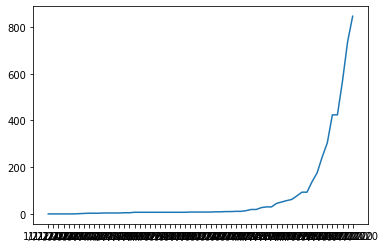

In [11]:
# For Canada
plt.plot(coronaData.iloc[49])

In [298]:
# Now let's just initialize an x array
# First let's get the number of y values
# We realize later that we need to reduce size by 6
n = coronaData.iloc[49].size - 25
# now forloop the creation
x = range(1,n+1,1)
# But in reality we can't have 0s sooo let's just look at data
x = np.array(x)

In [299]:
# So it turned out that we were chilling for more than 20 days
# Before it started getting out of control

In [300]:
# We see that the first 6 data points are 0s and therefore unusable
# So let's not include them
y = coronaData.iloc[49].iloc[25:]

In [301]:
# Apply ployfit with with weight to reduce bias
pcov,popt = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

In [302]:
# Add a place to store the array of predictions
y_pred = []

In [303]:
for val in range(n):
    y_pred.append(np.exp(popt)*np.exp(pcov*(val+1)))

In [304]:
y_pred_np = np.array(y_pred)

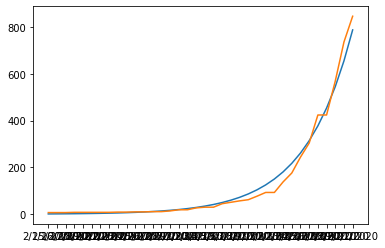

In [305]:
plt.plot(y_pred_np)
plt.plot(y)
# We see that our predictions are pretty accurate?

In [306]:
# When we simply removed 6 0s, the resulting predictions show that
# It was being too dependent on the dataset with low values
# aka when Corona wasn't that bad
# So we gotta remove some more early data points
# To make the model more accurate

In [307]:
# Let's check how well the data correlates
data = df.DataFrame(data=y_pred_np)

In [308]:
# So we see a secondary trend, let's isolate it
y_delta = y_pred_np - y

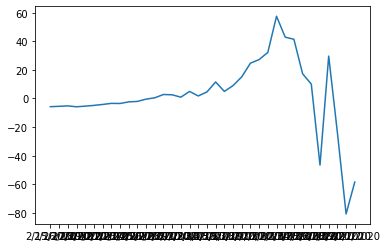

In [309]:
y_delta
plt.plot(y_delta)
# We see that prediction was accurate for a while
# But then there is a drastic increase in error

In [311]:
r = np.corrcoef(y_pred_np,y)

In [312]:
r

array([[1.        , 0.99403986],
       [0.99403986, 1.        ]])